In [ ]:
pip install nltk pandas


In [ ]:
from google.colab import files

uploaded = files.upload()  # Pilih file secara manual dari perangkat


Saving dataset TA - Sheet1.csv to dataset TA - Sheet1.csv


In [ ]:
import pandas as pd
import io

# Ambil nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Baca dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Tampilkan 5 baris pertama untuk verifikasi
df.head()


,No,Soal,Kunci Jawaban,Jawaban ChatGPT,Jawaban Gemini,Jawaban LLAMA
0,NaN,jelaskan yang dimaksud dengan laporan hasil ob...,Laporan hasil observasi merupakan jenis \nteks...,Laporan hasil observasi adalah dokumen yang me...,Laporan hasil observasi adalah teks yang menya...,Laporan hasil observasi adalah sebuah dokumen ...
1,NaN,Jelaskan fungsi sosial dari teks laporan hasil...,Teks laporan hasil observasi berfungsi \nuntuk...,Fungsi sosial dari teks laporan hasil observas...,Teks laporan hasil observasi memiliki beberapa...,Teks laporan hasil observasi memiliki beberapa...
2,NaN,Jelaskan struktur teks laporan hasil observasi...,Struktur teks laporan hasil observasi terdiri ...,Struktur teks laporan hasil observasi terdiri ...,Teks laporan hasil observasi memiliki struktur...,Berikut adalah struktur teks laporan hasil obs...
3,NaN,Jelaskan kaidah kebahasaan yang terdapat dalam...,Kaidah kebahasaan teks laporan hasil \nobserva...,Kaidah kebahasaan dalam teks laporan hasil obs...,Teks laporan hasil observasi memiliki kaidah k...,Teks laporan hasil observasi memiliki beberapa...
4,NaN,Jelaskan perbedaan antara kalimat definisi dan...,Kalimat definisi adalah suatu kalimat yang \nm...,Perbedaan antara kalimat definisi dan kalimat ...,Kalimat definisi dan kalimat deskripsi memilik...,Berikut adalah perbedaan antara kalimat defini...


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Function to ensure NLTK resources are downloaded
def download_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print("Downloading required NLTK resources...")
        nltk.download('punkt', quiet=False)
        print("Download complete.")
    try:
        nltk.data.find('tokenizers/punkt_tab')
    except LookupError:
        print("Downloading required NLTK punkt_tab resource...")
        nltk.download('punkt_tab', quiet=False)
        print("Download complete.")


# Preprocessing function with debugging (no stopword removal)
def preprocess_text(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        return ""

    # Step 1: Convert to lowercase
    text = text.lower()
    print(f"After lowercasing: {text}")

    # Step 2: Remove numbers
    text = re.sub(r'\d+', '', text)
    print(f"After number removal: {text}")

    # Step 3: Remove punctuation (improved regex)
    # Remove all characters that are not letters or whitespace
    text = re.sub(r'[^\w\s]', '', text)
    # Explicitly remove additional punctuation or special characters
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', text)
    print(f"After punctuation removal: {text}")

    # Step 4: Remove special characters and extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    print(f"After whitespace cleaning: {text}")

    # Step 5: Tokenization
    tokens = word_tokenize(text)
    print(f"After tokenization: {tokens}")

    # Step 6: Skip stopword removal to keep all words
    print(f"Retaining all tokens: {tokens}")

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    print(f"Final cleaned text: {cleaned_text}")

    return cleaned_text

# Main function to preprocess dataset and save to CSV
def preprocess_dataset(file_path):
    # Ensure NLTK resources are downloaded
    download_nltk_resources()

    # Load dataset
    df = pd.read_csv(file_path)

    # Columns to preprocess
    columns_to_process = ['Kunci Jawaban', 'Jawaban ChatGPT', 'Jawaban Gemini', 'Jawaban LLAMA']

    # Apply preprocessing to each column, overwriting the original columns
    for column in columns_to_process:
        print(f"\nPreprocessing column: {column}")
        df[column] = df[column].apply(preprocess_text)

    # Save the preprocessed dataset
    output_file = 'preprocessed_dataset.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')
    print(f"\nPreprocessed dataset saved to {output_file}")

    # Display a sample of the saved data for verification
    print("\nSample of the saved CSV data:")
    saved_df = pd.read_csv(output_file)
    print(saved_df[columns_to_process].head())

    return df, columns_to_process

# Example usage
if __name__ == "__main__":
    file_path = "dataset TA - Sheet1.csv"
    preprocessed_df, columns_to_process = preprocess_dataset(file_path)
    print("\nSample of preprocessed columns from the DataFrame:")
    print(preprocessed_df[columns_to_process].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Download complete.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Output streaming akan dipotong hingga 5000 baris terakhir.
laporan berdasarkan tujuan
.	laporan informasi: laporan yang dibuat untuk memberikan informasi tentang kegiatan dan hasilnya.
.	laporan analisis: laporan yang dibuat untuk menganalisis kegiatan dan hasilnya.
.	laporan evaluasi: laporan yang dibuat untuk mengevaluasi kegiatan dan hasilnya.
.	laporan rekomendasi: laporan yang dibuat untuk memberikan rekomendasi tentang kegiatan dan hasilnya.
laporan berdasarkan bentuk
.	laporan formal: laporan yang dibuat dengan bahasa formal dan struktur yang ketat.
.	laporan informal: laporan yang dibuat dengan bahasa informal dan struktur yang fleksibel.
.	laporan popular: laporan yang dibuat untuk masyarakat umum dengan bahasa yang sederhana dan mudah dipahami.


After punctuation removal: berikut adalah beberapa jenis laporan
jenisjenis laporan
	laporan harian laporan yang dibuat setiap hari untuk mendokumentasikan kegiatan dan kemajuan proyek
	laporan mingguan laporan yang dibuat setiap min

In [ ]:
print(df.isnull().sum())  # Cek jumlah NaN
print(df.head())  # Lihat 5 baris pertama
print(df.dtypes)  # Cek tipe data kolom



No                 203
Soal                 0
Kunci Jawaban        0
Jawaban ChatGPT      1
Jawaban Gemini       0
Jawaban LLAMA        0
dtype: int64
   No                                               Soal  \
0 NaN  jelaskan yang dimaksud dengan laporan hasil ob...   
1 NaN  Jelaskan fungsi sosial dari teks laporan hasil...   
2 NaN  Jelaskan struktur teks laporan hasil observasi...   
3 NaN  Jelaskan kaidah kebahasaan yang terdapat dalam...   
4 NaN  Jelaskan perbedaan antara kalimat definisi dan...   

                                       Kunci Jawaban  \
0  Laporan hasil observasi merupakan jenis \nteks...   
1  Teks laporan hasil observasi berfungsi \nuntuk...   
2  Struktur teks laporan hasil observasi terdiri ...   
3  Kaidah kebahasaan teks laporan hasil \nobserva...   
4  Kalimat definisi adalah suatu kalimat yang \nm...   

                                     Jawaban ChatGPT  \
0  Laporan hasil observasi adalah dokumen yang me...   
1  Fungsi sosial dari teks laporan hasi

#hapus Kolom "No" Berisi NaN

In [ ]:
df.drop(columns=["No"], inplace=True)


#Terdapat 1 NaN di "Jawaban ChatGPT"

In [ ]:
df["Jawaban ChatGPT"].fillna("", inplace=True)  # Ganti NaN dengan string kosong


/tmp/ipython-input-7-4035426019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Jawaban ChatGPT"].fillna("", inplace=True)  # Ganti NaN dengan string kosong


#Cek Jika Ada Karakter "\n" (Newline) yang Tidak Dibutuhkan

In [ ]:
df.replace(r'\n', ' ', regex=True, inplace=True)


#Pastikan tidak ada NaN atau string kosong dan cek tipe data kolom

In [ ]:
print(df.isnull().sum())  # Cek jumlah NaN
print(df.head())  # Lihat 5 baris pertama
print(df.dtypes)  # Cek tipe data kolom

Soal               0
Kunci Jawaban      0
Jawaban ChatGPT    0
Jawaban Gemini     0
Jawaban LLAMA      0
dtype: int64
                                                Soal  \
0  jelaskan yang dimaksud dengan laporan hasil ob...   
1  Jelaskan fungsi sosial dari teks laporan hasil...   
2  Jelaskan struktur teks laporan hasil observasi!     
3  Jelaskan kaidah kebahasaan yang terdapat dalam...   
4  Jelaskan perbedaan antara kalimat definisi dan...   

                                       Kunci Jawaban  \
0  Laporan hasil observasi merupakan jenis  teks ...   
1  Teks laporan hasil observasi berfungsi  untuk ...   
2  Struktur teks laporan hasil observasi terdiri ...   
3  Kaidah kebahasaan teks laporan hasil  observas...   
4  Kalimat definisi adalah suatu kalimat yang  me...   

                                     Jawaban ChatGPT  \
0  Laporan hasil observasi adalah dokumen yang me...   
1  Fungsi sosial dari teks laporan hasil observas...   
2  Struktur teks laporan hasil observasi

#membuat Embedding

In [ ]:
import pandas as pd

# Load dataset yang telah dipreprocessing
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Cek apakah data sudah terbaca dengan benar
print(df.head())


   No                                               Soal  \
0 NaN  jelaskan yang dimaksud dengan laporan hasil ob...   
1 NaN  Jelaskan fungsi sosial dari teks laporan hasil...   
2 NaN  Jelaskan struktur teks laporan hasil observasi...   
3 NaN  Jelaskan kaidah kebahasaan yang terdapat dalam...   
4 NaN  Jelaskan perbedaan antara kalimat definisi dan...   

                                       Kunci Jawaban  \
0  laporan hasil observasi merupakan jenis teks y...   
1  teks laporan hasil observasi berfungsi untuk m...   
2  struktur teks laporan hasil observasi terdiri ...   
3  kaidah kebahasaan teks laporan hasil observasi...   
4  kalimat definisi adalah suatu kalimat yang mem...   

                                     Jawaban ChatGPT  \
0  laporan hasil observasi adalah dokumen yang me...   
1  fungsi sosial dari teks laporan hasil observas...   
2  struktur teks laporan hasil observasi terdiri ...   
3  kaidah kebahasaan dalam teks laporan hasil obs...   
4  perbedaan antara ka

In [ ]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np


In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.24k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
# Daftar kolom yang akan dikonversi ke embedding
columns_to_embed = ["Kunci Jawaban", "Jawaban ChatGPT", "Jawaban Gemini", "Jawaban LLAMA"]

# Proses embedding
for col in columns_to_embed:
    df[col + "_Embedding"] = df[col].apply(lambda x: model.encode(str(x)))

# Cek hasil embedding
df.head()


,No,Soal,Kunci Jawaban,Jawaban ChatGPT,Jawaban Gemini,Jawaban LLAMA,Kunci Jawaban_Embedding,Jawaban ChatGPT_Embedding,Jawaban Gemini_Embedding,Jawaban LLAMA_Embedding
0,NaN,jelaskan yang dimaksud dengan laporan hasil ob...,laporan hasil observasi merupakan jenis teks y...,laporan hasil observasi adalah dokumen yang me...,laporan hasil observasi adalah teks yang menya...,laporan hasil observasi adalah sebuah dokumen ...,"[0.005767285, 0.06498419, -0.053728756, -0.070...","[0.01616611, 0.050709233, 0.023979597, 0.02382...","[0.0058189947, 0.056370653, 0.017724385, 0.027...","[0.0076573854, 0.05068157, 0.010074743, 0.0211..."
1,NaN,Jelaskan fungsi sosial dari teks laporan hasil...,teks laporan hasil observasi berfungsi untuk m...,fungsi sosial dari teks laporan hasil observas...,teks laporan hasil observasi memiliki beberapa...,teks laporan hasil observasi memiliki beberapa...,"[-0.021463912, 0.054484293, -0.015555826, -0.0...","[7.0047565e-05, 0.056024693, 0.021707708, 0.00...","[-0.008824196, 0.05545112, 0.030189587, 0.0096...","[0.0013213736, 0.053431083, 0.015364174, 0.012..."
2,NaN,Jelaskan struktur teks laporan hasil observasi...,struktur teks laporan hasil observasi terdiri ...,struktur teks laporan hasil observasi terdiri ...,teks laporan hasil observasi memiliki struktur...,berikut adalah struktur teks laporan hasil obs...,"[-0.0001285621, 0.080849215, -0.0047806846, 0....","[-0.001502949, 0.06893142, -0.0068657314, 0.00...","[-0.013096383, 0.05740151, 0.009951142, 0.0010...","[0.008823238, 0.055592027, -0.008710535, -0.01..."
3,NaN,Jelaskan kaidah kebahasaan yang terdapat dalam...,kaidah kebahasaan teks laporan hasil observasi...,kaidah kebahasaan dalam teks laporan hasil obs...,teks laporan hasil observasi memiliki kaidah k...,teks laporan hasil observasi memiliki beberapa...,"[-0.03070198, 0.074358724, 0.023334589, -0.036...","[-0.017308466, 0.057254706, 0.014102224, 0.008...","[-0.0069628963, 0.09822983, 0.003691295, 0.015...","[-0.038666427, 0.09658394, -0.0066161905, 0.01..."
4,NaN,Jelaskan perbedaan antara kalimat definisi dan...,kalimat definisi adalah suatu kalimat yang mem...,perbedaan antara kalimat definisi dan kalimat ...,kalimat definisi dan kalimat deskripsi memilik...,berikut adalah perbedaan antara kalimat defini...,"[0.034748457, 0.038570993, 0.022920744, -0.078...","[-0.019163532, 0.048838213, 0.021535084, 0.007...","[-0.03239334, 0.040557165, -0.002382995, 0.009...","[-0.020715501, 0.058784567, 0.024253014, 0.007..."


In [ ]:
# Daftar kolom yang akan dikonversi ke embedding
columns_to_embed = ["Kunci Jawaban", "Jawaban ChatGPT", "Jawaban Gemini", "Jawaban LLAMA"]

# Proses embedding dan hitung panjang vektor
for col in columns_to_embed:
    embedding_col = col + "_Embedding"
    df[embedding_col] = df[col].apply(lambda x: model.encode(str(x)))
    df[embedding_col + "_Length"] = df[embedding_col].apply(lambda x: len(x))

# Cek hasil embedding dan panjang vektor
df.head()


,No,Soal,Kunci Jawaban,Jawaban ChatGPT,Jawaban Gemini,Jawaban LLAMA,Kunci Jawaban_Embedding,Jawaban ChatGPT_Embedding,Jawaban Gemini_Embedding,Jawaban LLAMA_Embedding,Kunci Jawaban_Embedding_Length,Jawaban ChatGPT_Embedding_Length,Jawaban Gemini_Embedding_Length,Jawaban LLAMA_Embedding_Length
0,NaN,jelaskan yang dimaksud dengan laporan hasil ob...,laporan hasil observasi merupakan jenis teks y...,laporan hasil observasi adalah dokumen yang me...,laporan hasil observasi adalah teks yang menya...,laporan hasil observasi adalah sebuah dokumen ...,"[0.005767285, 0.06498419, -0.053728756, -0.070...","[0.01616611, 0.050709233, 0.023979597, 0.02382...","[0.0058189947, 0.056370653, 0.017724385, 0.027...","[0.0076573854, 0.05068157, 0.010074743, 0.0211...",512,512,512,512
1,NaN,Jelaskan fungsi sosial dari teks laporan hasil...,teks laporan hasil observasi berfungsi untuk m...,fungsi sosial dari teks laporan hasil observas...,teks laporan hasil observasi memiliki beberapa...,teks laporan hasil observasi memiliki beberapa...,"[-0.021463912, 0.054484293, -0.015555826, -0.0...","[7.0047565e-05, 0.056024693, 0.021707708, 0.00...","[-0.008824196, 0.05545112, 0.030189587, 0.0096...","[0.0013213736, 0.053431083, 0.015364174, 0.012...",512,512,512,512
2,NaN,Jelaskan struktur teks laporan hasil observasi...,struktur teks laporan hasil observasi terdiri ...,struktur teks laporan hasil observasi terdiri ...,teks laporan hasil observasi memiliki struktur...,berikut adalah struktur teks laporan hasil obs...,"[-0.0001285621, 0.080849215, -0.0047806846, 0....","[-0.001502949, 0.06893142, -0.0068657314, 0.00...","[-0.013096383, 0.05740151, 0.009951142, 0.0010...","[0.008823238, 0.055592027, -0.008710535, -0.01...",512,512,512,512
3,NaN,Jelaskan kaidah kebahasaan yang terdapat dalam...,kaidah kebahasaan teks laporan hasil observasi...,kaidah kebahasaan dalam teks laporan hasil obs...,teks laporan hasil observasi memiliki kaidah k...,teks laporan hasil observasi memiliki beberapa...,"[-0.03070198, 0.074358724, 0.023334589, -0.036...","[-0.017308466, 0.057254706, 0.014102224, 0.008...","[-0.0069628963, 0.09822983, 0.003691295, 0.015...","[-0.038666427, 0.09658394, -0.0066161905, 0.01...",512,512,512,512
4,NaN,Jelaskan perbedaan antara kalimat definisi dan...,kalimat definisi adalah suatu kalimat yang mem...,perbedaan antara kalimat definisi dan kalimat ...,kalimat definisi dan kalimat deskripsi memilik...,berikut adalah perbedaan antara kalimat defini...,"[0.034748457, 0.038570993, 0.022920744, -0.078...","[-0.019163532, 0.048838213, 0.021535084, 0.007...","[-0.03239334, 0.040557165, -0.002382995, 0.009...","[-0.020715501, 0.058784567, 0.024253014, 0.007...",512,512,512,512


In [ ]:
print(df[[col + "_Embedding" for col in columns_to_embed] +
         [col + "_Embedding_Length" for col in columns_to_embed]].head())


                             Kunci Jawaban_Embedding  \
0  [0.014735962, 0.067059495, -0.08788254, -0.051...   
1  [-0.021553311, 0.026007453, -0.023203274, -0.0...   
2  [-0.013865102, 0.07817334, -0.012650409, 0.014...   
3  [-0.032443386, 0.07147589, 0.026109584, -0.000...   
4  [0.017328063, 0.034004632, -0.0003782387, -0.0...   

                           Jawaban ChatGPT_Embedding  \
0  [0.013521492, 0.0412952, -0.04204179, 0.021394...   
1  [0.055461604, 0.014871864, 0.031408165, 0.0116...   
2  [-0.014859757, 0.06666463, -0.03179265, 0.0025...   
3  [-0.0053609083, 0.06738913, -0.0013747507, 0.0...   
4  [-0.022222, 0.04567363, 0.0060210396, 0.002522...   

                            Jawaban Gemini_Embedding  \
0  [0.006050843, 0.04872872, -0.06696619, 0.02293...   
1  [0.0073354356, 0.0007115389, 0.016017267, 0.01...   
2  [0.004422788, 0.012713584, 0.011542001, 0.0123...   
3  [-0.015713694, 0.042461522, 0.0035316078, 0.02...   
4  [-0.033290274, 0.032642417, -0.020570774, 0

In [ ]:
import numpy as np
import pandas as pd

# Set Pandas agar menampilkan seluruh isi kolom dan array
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Tampilkan baris 0 sampai 9 untuk melihat seluruh embedding
print(df[[col + "_Embedding" for col in columns_to_embed]].iloc[:10])


#Cossine Similarity


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.metrics.pairwise import cosine_similarity

# Normalisasi nama kolom (replace spasi dengan underscore)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Pastikan embedding dalam bentuk numpy array
for col in ["Kunci_Jawaban_Embedding", "Jawaban_ChatGPT_Embedding", "Jawaban_Gemini_Embedding", "Jawaban_LLAMA_Embedding"]:
    df[col] = df[col].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))

# Fungsi untuk menghitung cosine similarity
def compute_cosine_similarity(row, model_col):
    return cosine_similarity([row["Kunci_Jawaban_Embedding"]], [row[model_col]])[0][0]

# Hitung similarity untuk tiap model
df["Similarity_ChatGPT"] = df.apply(lambda row: compute_cosine_similarity(row, "Jawaban_ChatGPT_Embedding"), axis=1)
df["Similarity_Gemini"] = df.apply(lambda row: compute_cosine_similarity(row, "Jawaban_Gemini_Embedding"), axis=1)
df["Similarity_LLAMA"] = df.apply(lambda row: compute_cosine_similarity(row, "Jawaban_LLAMA_Embedding"), axis=1)

# Tampilkan hasil
df.head()


,No,Soal,Kunci_Jawaban,Jawaban_ChatGPT,Jawaban_Gemini,Jawaban_LLAMA,Kunci_Jawaban_Embedding,Jawaban_ChatGPT_Embedding,Jawaban_Gemini_Embedding,Jawaban_LLAMA_Embedding,Similarity_ChatGPT,Similarity_Gemini,Similarity_LLAMA
0,NaN,jelaskan yang dimaksud dengan laporan hasil ob...,laporan hasil observasi merupakan jenis teks y...,laporan hasil observasi adalah dokumen yang me...,laporan hasil observasi adalah teks yang menya...,laporan hasil observasi adalah sebuah dokumen ...,"[0.005767285, 0.06498419, -0.053728756, -0.070...","[0.01616611, 0.050709233, 0.023979597, 0.02382...","[0.0058189947, 0.056370653, 0.017724385, 0.027...","[0.0076573854, 0.05068157, 0.010074743, 0.0211...",0.365944,0.432999,0.338304
1,NaN,Jelaskan fungsi sosial dari teks laporan hasil...,teks laporan hasil observasi berfungsi untuk m...,fungsi sosial dari teks laporan hasil observas...,teks laporan hasil observasi memiliki beberapa...,teks laporan hasil observasi memiliki beberapa...,"[-0.021463912, 0.054484293, -0.015555826, -0.0...","[7.0047565e-05, 0.056024693, 0.021707708, 0.00...","[-0.008824196, 0.05545112, 0.030189587, 0.0096...","[0.0013213736, 0.053431083, 0.015364174, 0.012...",0.518720,0.475094,0.449925
2,NaN,Jelaskan struktur teks laporan hasil observasi...,struktur teks laporan hasil observasi terdiri ...,struktur teks laporan hasil observasi terdiri ...,teks laporan hasil observasi memiliki struktur...,berikut adalah struktur teks laporan hasil obs...,"[-0.0001285621, 0.080849215, -0.0047806846, 0....","[-0.001502949, 0.06893142, -0.0068657314, 0.00...","[-0.013096383, 0.05740151, 0.009951142, 0.0010...","[0.008823238, 0.055592027, -0.008710535, -0.01...",0.940527,0.896729,0.759541
3,NaN,Jelaskan kaidah kebahasaan yang terdapat dalam...,kaidah kebahasaan teks laporan hasil observasi...,kaidah kebahasaan dalam teks laporan hasil obs...,teks laporan hasil observasi memiliki kaidah k...,teks laporan hasil observasi memiliki beberapa...,"[-0.03070198, 0.074358724, 0.023334589, -0.036...","[-0.017308466, 0.057254706, 0.014102224, 0.008...","[-0.0069628963, 0.09822983, 0.003691295, 0.015...","[-0.038666427, 0.09658394, -0.0066161905, 0.01...",0.403675,0.421815,0.418577
4,NaN,Jelaskan perbedaan antara kalimat definisi dan...,kalimat definisi adalah suatu kalimat yang mem...,perbedaan antara kalimat definisi dan kalimat ...,kalimat definisi dan kalimat deskripsi memilik...,berikut adalah perbedaan antara kalimat defini...,"[0.034748457, 0.038570993, 0.022920744, -0.078...","[-0.019163532, 0.048838213, 0.021535084, 0.007...","[-0.03239334, 0.040557165, -0.002382995, 0.009...","[-0.020715501, 0.058784567, 0.024253014, 0.007...",0.629844,0.556870,0.638036


In [ ]:
print(df[["Soal", "Similarity_ChatGPT", "Similarity_Gemini", "Similarity_LLAMA"]])

                                                  Soal  Similarity_ChatGPT  \
0    jelaskan yang dimaksud dengan laporan hasil ob...            0.365944   
1    Jelaskan fungsi sosial dari teks laporan hasil...            0.518720   
2    Jelaskan struktur teks laporan hasil observasi...            0.940527   
3    Jelaskan kaidah kebahasaan yang terdapat dalam...            0.403675   
4    Jelaskan perbedaan antara kalimat definisi dan...            0.629844   
..                                                 ...                 ...   
198  Sebutkan tugas sutradara dalam sebuah pementas...            0.639971   
199  Sebutkan fasilitas pementasan yang dapat menun...            0.476723   
200  Perhatikan kutipan naskah drama di bawah ini u...            0.453818   
201  Perhatikan kutipan naskah drama di bawah ini u...            0.530178   
202  Perhatikan kutipan naskah drama di bawah ini u...            0.513111   

     Similarity_Gemini  Similarity_LLAMA  
0             0.4329

Rata-rata Cosine Similarity:
ChatGPT: 0.5592
Gemini: 0.5651
LLAMA: 0.5617


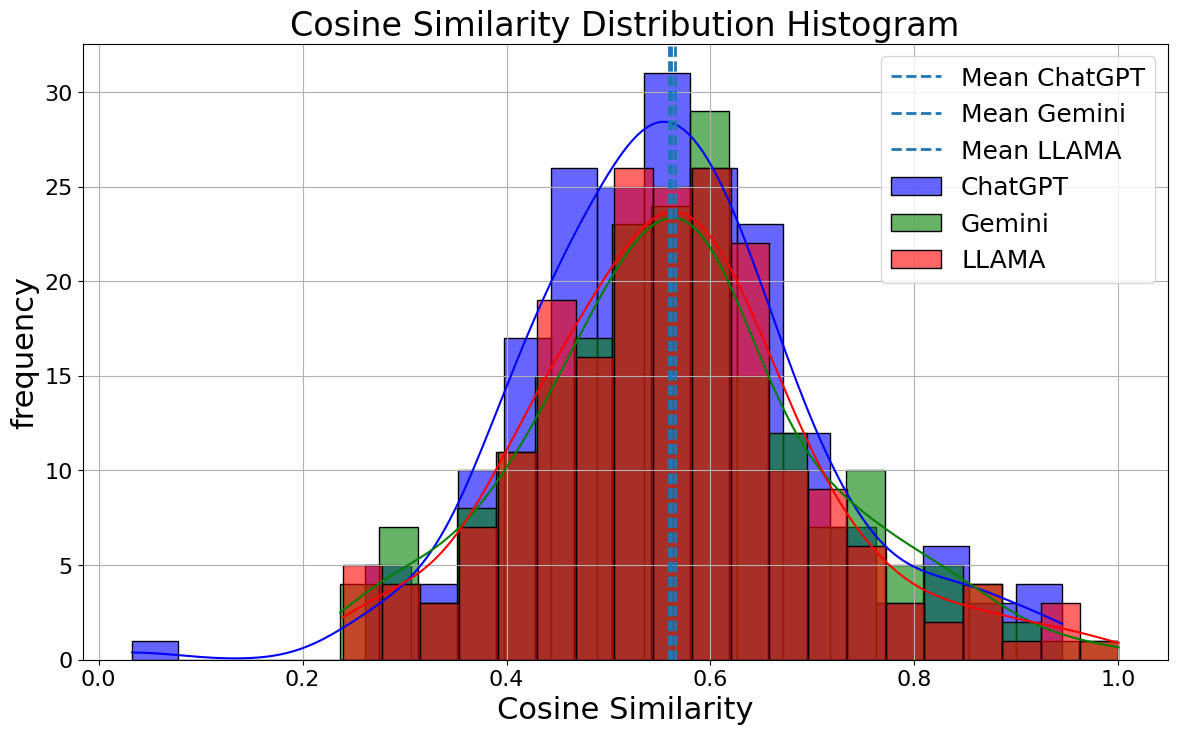

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel ukuran font default LEBIH BESAR
plt.rcParams.update({
    'font.size': 18,             # Ukuran font umum
    'axes.titlesize': 24,        # Ukuran judul
    'axes.labelsize': 22,        # Ukuran label sumbu
    'legend.fontsize': 18,       # Ukuran font legenda
    'xtick.labelsize': 16,       # Ukuran label sumbu x
    'ytick.labelsize': 16        # Ukuran label sumbu y
})

# Hitung rata-rata similarity untuk setiap model
mean_similarity = {
    "ChatGPT": df["Similarity_ChatGPT"].mean(),
    "Gemini": df["Similarity_Gemini"].mean(),
    "LLAMA": df["Similarity_LLAMA"].mean(),
}

# Cetak rata-rata similarity
print("Rata-rata Cosine Similarity:")
for model, score in mean_similarity.items():
    print(f"{model}: {score:.4f}")

# Buat histogram
plt.figure(figsize=(14, 8))
sns.histplot(df["Similarity_ChatGPT"], bins=20, color="blue", label="ChatGPT", kde=True, alpha=0.6)
sns.histplot(df["Similarity_Gemini"], bins=20, color="green", label="Gemini", kde=True, alpha=0.6)
sns.histplot(df["Similarity_LLAMA"], bins=20, color="red", label="LLAMA", kde=True, alpha=0.6)

# Tambahkan garis rata-rata
for model, score in mean_similarity.items():
    plt.axvline(score, linestyle="dashed", label=f"Mean {model}", linewidth=2)

# Konfigurasi plot
plt.xlabel("Cosine Similarity")
plt.ylabel("frequency")
plt.title("Cosine Similarity Distribution Histogram")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


#BERT SCORE

In [ ]:
!pip install bert-score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.metrics.pairwise import cosine_similarity
from bert_score import score


In [ ]:
# Normalisasi nama kolom (replace spasi dengan underscore)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Pastikan embedding dalam bentuk numpy array
for col in ["Kunci_Jawaban_Embedding", "Jawaban_ChatGPT_Embedding", "Jawaban_Gemini_Embedding", "Jawaban_LLAMA_Embedding"]:
    df[col] = df[col].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))


In [ ]:
# Pastikan jawaban berbentuk string
df["Kunci_Jawaban"] = df["Kunci_Jawaban"].astype(str)
df["Jawaban_ChatGPT"] = df["Jawaban_ChatGPT"].astype(str)
df["Jawaban_Gemini"] = df["Jawaban_Gemini"].astype(str)
df["Jawaban_LLAMA"] = df["Jawaban_LLAMA"].astype(str)

# Fungsi untuk menghitung BERTScore
def compute_bertscore(predictions, references):
    P, R, F1 = score(predictions, references, lang="id", rescale_with_baseline=False)
    return F1.tolist()  # Ambil skor F1 sebagai hasil utama

# Hitung BERTScore untuk setiap model
df["BERTScore_ChatGPT"] = compute_bertscore(df["Jawaban_ChatGPT"].tolist(), df["Kunci_Jawaban"].tolist())
df["BERTScore_Gemini"] = compute_bertscore(df["Jawaban_Gemini"].tolist(), df["Kunci_Jawaban"].tolist())
df["BERTScore_LLAMA"] = compute_bertscore(df["Jawaban_LLAMA"].tolist(), df["Kunci_Jawaban"].tolist())


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
print(df[["BERTScore_ChatGPT", "BERTScore_Gemini", "BERTScore_LLAMA"]])


     BERTScore_ChatGPT  BERTScore_Gemini  BERTScore_LLAMA
0             0.676953          0.679911         0.614334
1             0.665847          0.659818         0.636164
2             0.675324          0.726876         0.653855
3             0.615405          0.667882         0.639144
4             0.680685          0.654515         0.688703
..                 ...               ...              ...
198           0.702304          0.667246         0.677199
199           0.684365          0.632210         0.679265
200           0.751000          0.734939         0.664817
201           0.821657          0.848502         0.716786
202           0.675130          0.652005         0.654467

[203 rows x 3 columns]


In [ ]:
# Tampilkan hasil
df.head()

,No,Soal,Kunci_Jawaban,Jawaban_ChatGPT,Jawaban_Gemini,Jawaban_LLAMA,Kunci_Jawaban_Embedding,Jawaban_ChatGPT_Embedding,Jawaban_Gemini_Embedding,Jawaban_LLAMA_Embedding,Similarity_ChatGPT,Similarity_Gemini,Similarity_LLAMA,BERTScore_ChatGPT,BERTScore_Gemini,BERTScore_LLAMA
0,NaN,jelaskan yang dimaksud dengan laporan hasil ob...,laporan hasil observasi merupakan jenis teks y...,laporan hasil observasi adalah dokumen yang me...,laporan hasil observasi adalah teks yang menya...,laporan hasil observasi adalah sebuah dokumen ...,"[0.005767285, 0.06498419, -0.053728756, -0.070...","[0.01616611, 0.050709233, 0.023979597, 0.02382...","[0.0058189947, 0.056370653, 0.017724385, 0.027...","[0.0076573854, 0.05068157, 0.010074743, 0.0211...",0.365944,0.432999,0.338304,0.676953,0.679911,0.614334
1,NaN,Jelaskan fungsi sosial dari teks laporan hasil...,teks laporan hasil observasi berfungsi untuk m...,fungsi sosial dari teks laporan hasil observas...,teks laporan hasil observasi memiliki beberapa...,teks laporan hasil observasi memiliki beberapa...,"[-0.021463912, 0.054484293, -0.015555826, -0.0...","[7.0047565e-05, 0.056024693, 0.021707708, 0.00...","[-0.008824196, 0.05545112, 0.030189587, 0.0096...","[0.0013213736, 0.053431083, 0.015364174, 0.012...",0.518720,0.475094,0.449925,0.665847,0.659818,0.636164
2,NaN,Jelaskan struktur teks laporan hasil observasi...,struktur teks laporan hasil observasi terdiri ...,struktur teks laporan hasil observasi terdiri ...,teks laporan hasil observasi memiliki struktur...,berikut adalah struktur teks laporan hasil obs...,"[-0.0001285621, 0.080849215, -0.0047806846, 0....","[-0.001502949, 0.06893142, -0.0068657314, 0.00...","[-0.013096383, 0.05740151, 0.009951142, 0.0010...","[0.008823238, 0.055592027, -0.008710535, -0.01...",0.940527,0.896729,0.759541,0.675324,0.726876,0.653855
3,NaN,Jelaskan kaidah kebahasaan yang terdapat dalam...,kaidah kebahasaan teks laporan hasil observasi...,kaidah kebahasaan dalam teks laporan hasil obs...,teks laporan hasil observasi memiliki kaidah k...,teks laporan hasil observasi memiliki beberapa...,"[-0.03070198, 0.074358724, 0.023334589, -0.036...","[-0.017308466, 0.057254706, 0.014102224, 0.008...","[-0.0069628963, 0.09822983, 0.003691295, 0.015...","[-0.038666427, 0.09658394, -0.0066161905, 0.01...",0.403675,0.421815,0.418577,0.615405,0.667882,0.639144
4,NaN,Jelaskan perbedaan antara kalimat definisi dan...,kalimat definisi adalah suatu kalimat yang mem...,perbedaan antara kalimat definisi dan kalimat ...,kalimat definisi dan kalimat deskripsi memilik...,berikut adalah perbedaan antara kalimat defini...,"[0.034748457, 0.038570993, 0.022920744, -0.078...","[-0.019163532, 0.048838213, 0.021535084, 0.007...","[-0.03239334, 0.040557165, -0.002382995, 0.009...","[-0.020715501, 0.058784567, 0.024253014, 0.007...",0.629844,0.556870,0.638036,0.680685,0.654515,0.688703


In [ ]:
# Menghitung rata-rata BERTScore untuk masing-masing model
mean_scores = df[["BERTScore_ChatGPT", "BERTScore_Gemini", "BERTScore_LLAMA"]].mean()

# Menampilkan hasil rata-rata
print("Rata-rata BERTScore:")
print(mean_scores)


Rata-rata BERTScore:
BERTScore_ChatGPT    0.674389
BERTScore_Gemini     0.673443
BERTScore_LLAMA      0.661157
dtype: float64


In [ ]:
# Menampilkan rata-rata dalam bentuk persen dengan 2 desimal
print("Rata-rata BERTScore (%):")
print((mean_scores * 100).round(2))


Rata-rata BERTScore (%):
BERTScore_ChatGPT    67.44
BERTScore_Gemini     67.34
BERTScore_LLAMA      66.12
dtype: float64


#MAE

In [ ]:
# BERTScore dianggap sebagai nilai acuan (ground truth)
# Similarity adalah hasil prediksi atau nilai yang ingin dibandingkan

# Hitung MAE dengan BERTScore sebagai nilai acuan dan Similarity sebagai prediksi
from sklearn.metrics import mean_absolute_error

mae_chatgpt = mean_absolute_error(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"])
mae_gemini = mean_absolute_error(df["Similarity_Gemini"], df["BERTScore_Gemini"])
mae_llama = mean_absolute_error(df["Similarity_LLAMA"], df["BERTScore_LLAMA"])

print("MAE ChatGPT:", mae_chatgpt)
print("MAE Gemini:", mae_gemini)
print("MAE LLAMA:", mae_llama)


MAE ChatGPT: 0.13886729903115427
MAE Gemini: 0.13348315325863844
MAE LLAMA: 0.13015335078897147


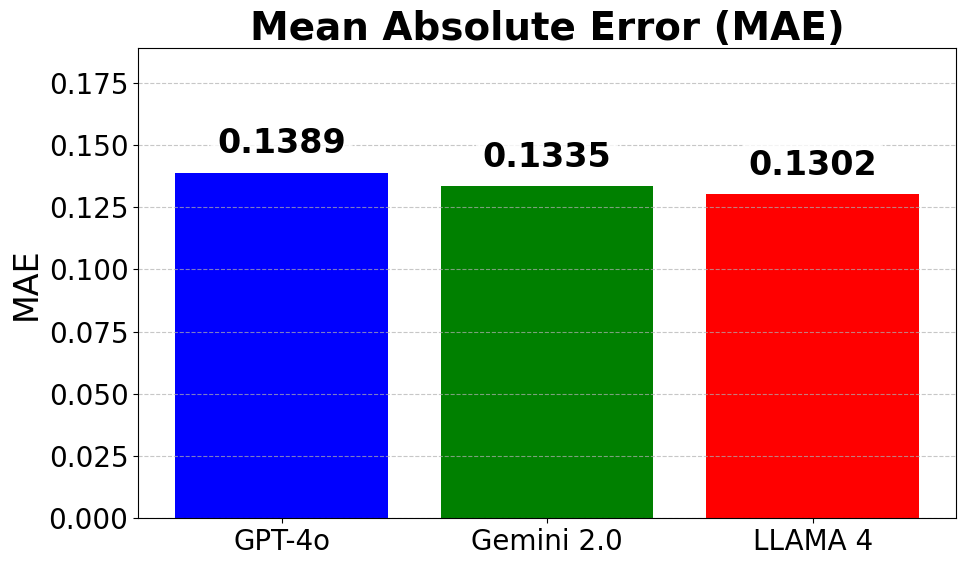

In [ ]:
import matplotlib.pyplot as plt

# Hitung MAE per soal
df["MAE_ChatGPT"] = abs(df["Similarity_ChatGPT"] - df["BERTScore_ChatGPT"])
df["MAE_Gemini"] = abs(df["Similarity_Gemini"] - df["BERTScore_Gemini"])
df["MAE_LLAMA"] = abs(df["Similarity_LLAMA"] - df["BERTScore_LLAMA"])

# Hitung rata-rata MAE per model
mean_mae = {
    "GPT-4o": df["MAE_ChatGPT"].mean(),
    "Gemini 2.0": df["MAE_Gemini"].mean(),
    "LLAMA 4": df["MAE_LLAMA"].mean()
}

# Warna untuk setiap model
colors = ['blue', 'green', 'red']

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_mae.keys(), mean_mae.values(), color=colors)

# Judul dan label
plt.title("Mean Absolute Error (MAE)", fontsize=28, fontweight='bold')
plt.ylabel("MAE", fontsize=24)

plt.ylim(0, max(mean_mae.values()) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas batang dengan kotak putih agar lebih jelas
for i, (model, val) in enumerate(mean_mae.items()):
    plt.text(
        i, val + 0.005, f"{val:.4f}",
        ha='center', va='bottom',
        fontsize=24, fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.8)
    )

# Perbesar font pada ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_chatgpt = mean_absolute_error(df["BERTScore_ChatGPT"], df["Similarity_ChatGPT"])
mae_gemini = mean_absolute_error(df["BERTScore_Gemini"], df["Similarity_Gemini"])
mae_llama = mean_absolute_error(df["BERTScore_LLAMA"], df["Similarity_LLAMA"])

print("MAE ChatGPT:", mae_chatgpt)
print("MAE Gemini:", mae_gemini)
print("MAE LLAMA:", mae_llama)

MAE ChatGPT: 0.13886729903115427
MAE Gemini: 0.13348315325863844
MAE LLAMA: 0.13015335078897147


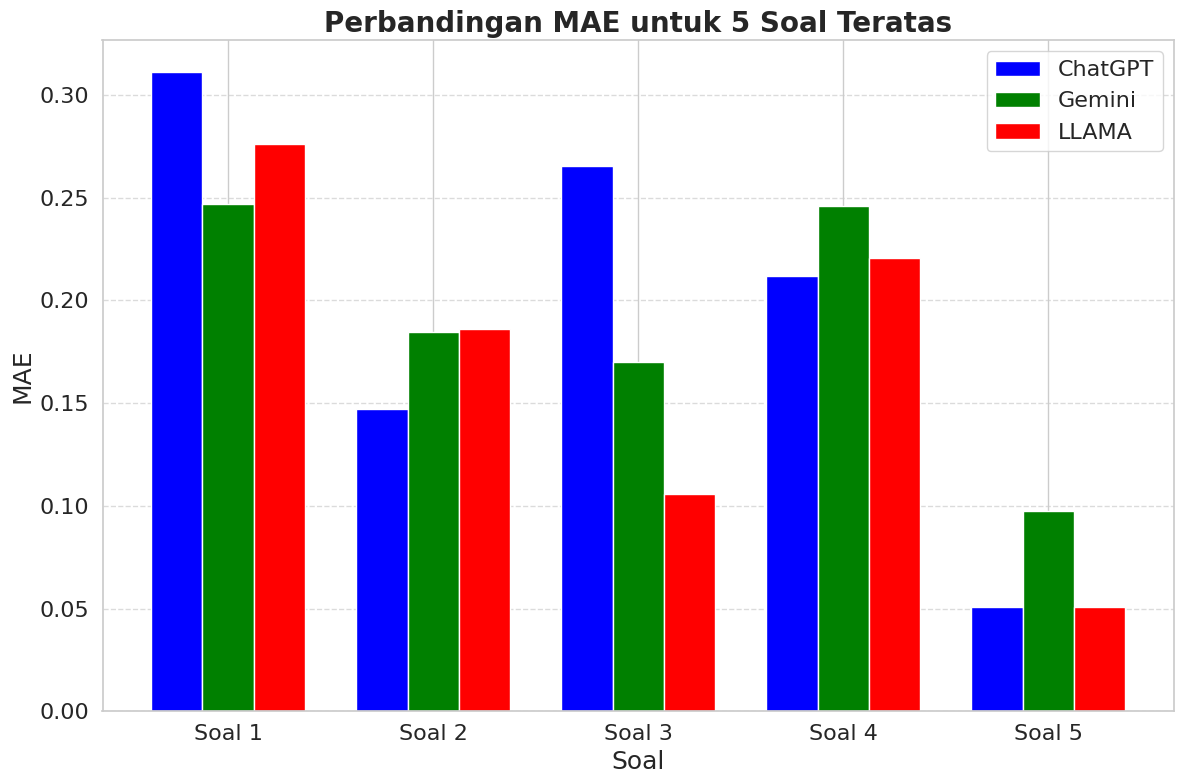

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung MAE per soal untuk setiap model
df["MAE_ChatGPT"] = abs(df["Similarity_ChatGPT"] - df["BERTScore_ChatGPT"])
df["MAE_Gemini"] = abs(df["Similarity_Gemini"] - df["BERTScore_Gemini"])
df["MAE_LLAMA"] = abs(df["Similarity_LLAMA"] - df["BERTScore_LLAMA"])

# Ambil 5 soal pertama
top5 = df.head(5)

# Indeks soal (misalnya soal ke-1 sampai ke-5)
soal_index = [f"Soal {i+1}" for i in range(len(top5))]

# Lebar batang
bar_width = 0.25
x = np.arange(len(top5))

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(x - bar_width, top5["MAE_ChatGPT"], width=bar_width, label="ChatGPT", color="blue")
plt.bar(x, top5["MAE_Gemini"], width=bar_width, label="Gemini", color="green")
plt.bar(x + bar_width, top5["MAE_LLAMA"], width=bar_width, label="LLAMA", color="red")

# Tambahkan label dan judul dengan font besar
plt.xlabel("Soal", fontsize=18)
plt.ylabel("MAE", fontsize=18)
plt.title("Perbandingan MAE untuk 5 Soal Teratas", fontsize=20, fontweight='bold')
plt.xticks(x, soal_index, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#Pearson korelation

In [ ]:
from scipy.stats import pearsonr

pearson_chatgpt, _ = pearsonr(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"])
pearson_gemini, _ = pearsonr(df["Similarity_Gemini"], df["BERTScore_Gemini"])
pearson_llama, _ = pearsonr(df["Similarity_LLAMA"], df["BERTScore_LLAMA"])

print("Pearson Correlation ChatGPT:", pearson_chatgpt)
print("Pearson Correlation Gemini:", pearson_gemini)
print("Pearson Correlation LLAMA:", pearson_llama)


Pearson Correlation ChatGPT: 0.45526907135656725
Pearson Correlation Gemini: 0.5698088837069983
Pearson Correlation LLAMA: 0.4947900012369125


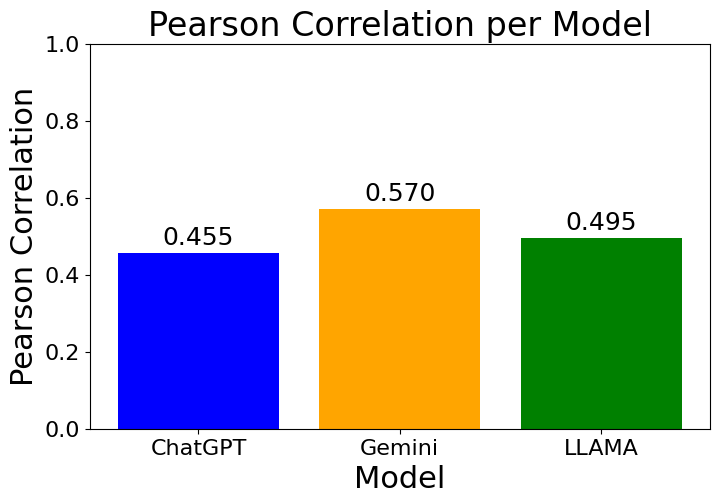

In [ ]:
import matplotlib.pyplot as plt

# Nilai Pearson Correlation dari masing-masing model
models = ['ChatGPT', 'Gemini', 'LLAMA']
pearson_values = [pearson_chatgpt, pearson_gemini, pearson_llama]

# Membuat diagram batang
plt.figure(figsize=(8,5))
bars = plt.bar(models, pearson_values, color=['blue', 'orange', 'green'])

# Memberi label nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.title('Pearson Correlation per Model')
plt.xlabel('Model')
plt.ylabel('Pearson Correlation')
plt.ylim(0, 1)  # Karena nilai korelasi Pearson berkisar -1 sampai 1, tapi biasanya korelasi positif dekat 0-1
plt.show()


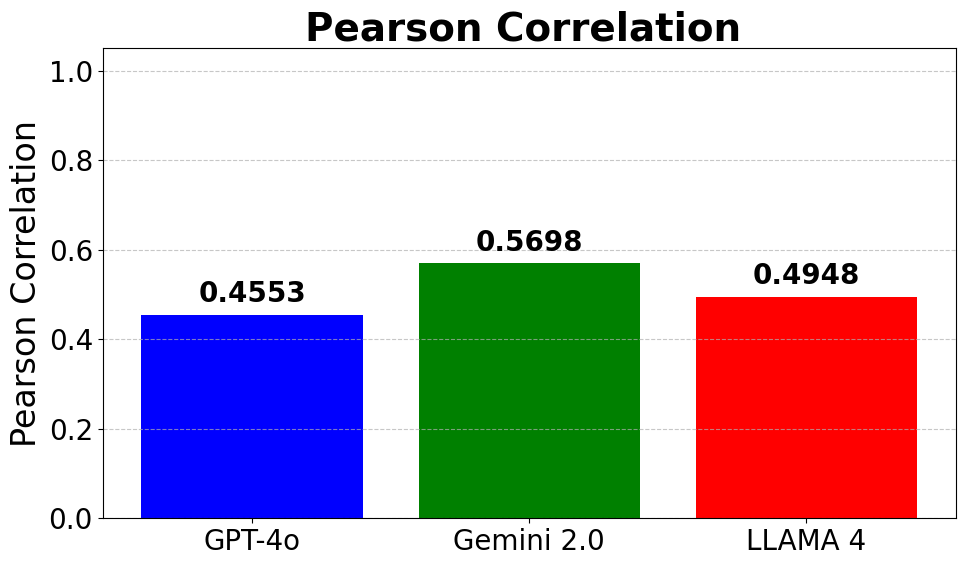

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# Hitung Pearson Correlation
pearson_chatgpt, _ = pearsonr(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"])
pearson_gemini, _ = pearsonr(df["Similarity_Gemini"], df["BERTScore_Gemini"])
pearson_llama, _ = pearsonr(df["Similarity_LLAMA"], df["BERTScore_LLAMA"])

# Data untuk plotting
models = ['GPT-4o', 'Gemini 2.0', 'LLAMA 4']
pearson_scores = [pearson_chatgpt, pearson_gemini, pearson_llama]
colors = ['blue', 'green', 'red']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, pearson_scores, color=colors)

# Tambahkan nilai di atas bar
for bar, score in zip(bars, pearson_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.015, f'{score:.4f}',
             ha='center', va='bottom', fontsize=20, fontweight='bold')  # nilai di atas bar

# Judul dan label dengan font besar
plt.title('Pearson Correlation ', fontsize=28, fontweight='bold')

plt.ylabel('Pearson Correlation', fontsize=24)

# Perbesar font pada ticks (angka di sumbu)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 1.05)  # Batas y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Spearman Rank Correlation

In [ ]:
from scipy.stats import spearmanr

spearman_chatgpt, _ = spearmanr(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"])
spearman_gemini, _ = spearmanr(df["Similarity_Gemini"], df["BERTScore_Gemini"])
spearman_llama, _ = spearmanr(df["Similarity_LLAMA"], df["BERTScore_LLAMA"])

print("Spearman Correlation ChatGPT:", spearman_chatgpt)
print("Spearman Correlation Gemini:", spearman_gemini)
print("Spearman Correlation LLAMA:", spearman_llama)


Spearman Correlation ChatGPT: 0.3902398788125698
Spearman Correlation Gemini: 0.47776222131051127
Spearman Correlation LLAMA: 0.3983592071174663


#RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_chatgpt = np.sqrt(mean_squared_error(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"]))
rmse_gemini = np.sqrt(mean_squared_error(df["Similarity_Gemini"], df["BERTScore_Gemini"]))
rmse_llama = np.sqrt(mean_squared_error(df["Similarity_LLAMA"], df["BERTScore_LLAMA"]))

print("RMSE ChatGPT:", rmse_chatgpt)
print("RMSE Gemini:", rmse_gemini)
print("RMSE LLAMA:", rmse_llama)


RMSE ChatGPT: 0.1694293505096012
RMSE Gemini: 0.16335464385860377
RMSE LLAMA: 0.15814266786080985


RMSE ChatGPT: 0.1694293505096012
RMSE Gemini: 0.16335464385860377
RMSE LLAMA: 0.15814266786080985


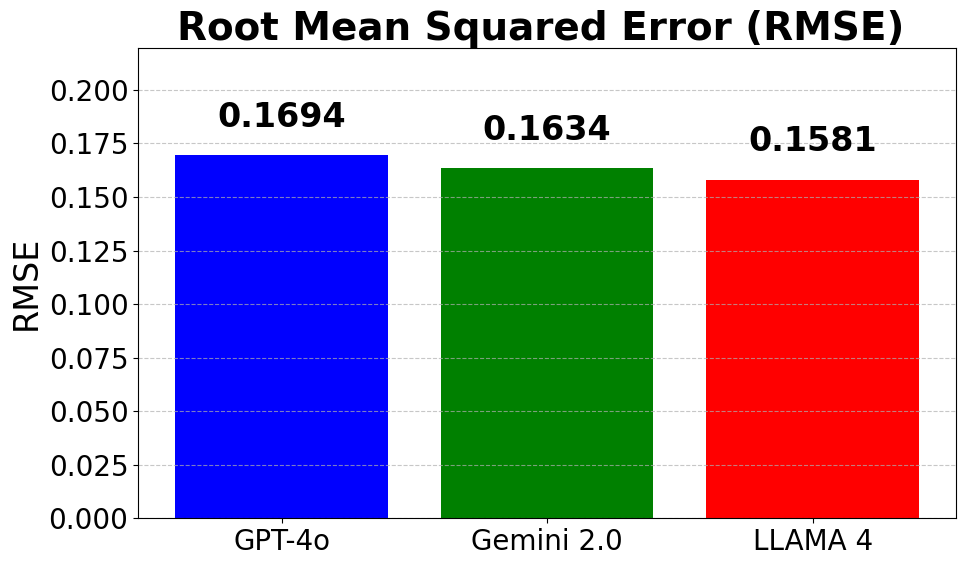

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Hitung RMSE
rmse_chatgpt = np.sqrt(mean_squared_error(df["Similarity_ChatGPT"], df["BERTScore_ChatGPT"]))
rmse_gemini = np.sqrt(mean_squared_error(df["Similarity_Gemini"], df["BERTScore_Gemini"]))
rmse_llama = np.sqrt(mean_squared_error(df["Similarity_LLAMA"], df["BERTScore_LLAMA"]))

# Cetak hasil
print("RMSE ChatGPT:", rmse_chatgpt)
print("RMSE Gemini:", rmse_gemini)
print("RMSE LLAMA:", rmse_llama)

# Data plotting
models = ['GPT-4o', 'Gemini 2.0', 'LLAMA 4']
rmse_scores = [rmse_chatgpt, rmse_gemini, rmse_llama]
colors = ['blue', 'green', 'red']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_scores, color=colors)

# Teks di atas bar (dengan font besar)
for bar, score in zip(bars, rmse_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.4f}',
             ha='center', va='bottom', fontsize=24, fontweight='bold')

# Judul dan label sumbu besar
plt.title('Root Mean Squared Error (RMSE) ', fontsize=28, fontweight='bold')

plt.ylabel('RMSE', fontsize=24)

# Perbesar angka sumbu
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, max(rmse_scores) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
